<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 2</b></p>
<p style="text-align: center;"><b>Note: This assignment has 7 questions (Q1-Q5 are 10 marks each, Q6-Q7 are 5 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1
Using the Breast Cancer dataset (`load_breast_cancer`) from `sklearn.datasets`, perform a logistic regression (without regularization) to predict whether a tumor is benign or malignant (`target`) based on the features: `mean radius`, `mean texture`, and `mean perimeter`. Where necessary, set seed values and/or random_state to `1`; set max_iter=`10000`.

##### (a) Use the model specification above to fit the entire Breast Cancer dataset. Using the fitted model, get the corresponding predicted `target` values and subsequently generate the confusion matrix. From the Confusion Matrix, report the True Positive, True Negative, False Positive and False Negative values.
##### (b) Use the values from the confusion matrix in `Q1a` to calculate the F1 score manually using the F1 Score formula. In addition, use an appropriate function from `sklearn` to compute the corresponding F1 score. Compare the two calculated F1 scores. Are they the same or different? Explain why.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit the logistic regression model (without regularization) using the training set. Calculate and report the F1-score on the validation set.
##### (d) Fit a Lasso Logistic Regression model (L1 regularization) with a penalty of `C = 0.6`. What is the F1 Score of the Lasso Logistic Regression model on the validation set?
##### (e) Based on the F1 Scores, which model (with or without regularization) performs better on the validation set?
##### (f) For the Lasso Logistic Regression model (L1 regularization), change the penalty to `C = 1e99`. What do you expect the resulting F1 Score to be on the validation set? Is the actual result aligned with your expectation? Explain your answer.

In [47]:
# Q1
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [49]:
# Q1a
# Loading dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Select features and target
X = df[['mean radius', 'mean texture', 'mean perimeter']].values
y = df['target'].values

# Logistic regression model
model = LogisticRegression(penalty = None, random_state=1, max_iter=10000)
model.fit(X, y)

y_pred = model.predict(X)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Answer: True Positive = 339, True Negative = 184, False Positive = 28 and False Negative = 18

Confusion Matrix:
 [[184  28]
 [ 18 339]]


In [51]:
# Q1b
# Manual Calculation
f1_manual = 339/(339+1/2*(28+18))
print(f"Manual F1 Score: {f1_manual}")

# F1 Score using sklearn
f1_sklearn = f1_score(y, y_pred)
print(f"Sklearn F1 Score: {f1_sklearn}")
# Answer: Manual F1 Score: 0.93646408839779, while Sklearn F1 Score: 0.93646408839779. 
# Both of the F1 score are the same as expected as they use the same data and formula, without any rounding errors or disrepancies.

Manual F1 Score: 0.93646408839779
Sklearn F1 Score: 0.93646408839779


In [55]:
# Q1c
# Splitting the data 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the logistic regression model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate F1 Score on the validation set
f1_val = f1_score(y_val, y_val_pred)
print(f"F1 Score on the validation set: {f1_val}")
# Answer: F1 Score on the validation set: 0.9041095890410958

F1 Score on the validation set: 0.9041095890410958


In [61]:
# Q1d
lasso_model = LogisticRegression(penalty='l1', C=0.6, solver='liblinear', random_state=1, max_iter=10000)
lasso_model.fit(X_train, y_train)

# Predict on the validation set
y_lasso_val_pred = lasso_model.predict(X_val)

# Calculate F1 Score on the validation set
f1_lasso_val = f1_score(y_val, y_lasso_val_pred)
print(f"F1 Score of the Lasso Logistic Regression model on the validation set: {f1_lasso_val}")
# Answer: F1 Score of the Lasso Logistic Regression model on the validation set: 0.9140271493212669

F1 Score of the Lasso Logistic Regression model on the validation set: 0.9140271493212669


In [63]:
# Q1e 

#Answer: Lasso Logistic Regression model performs better on the validation set as it has a higher F1 Score.

Lasso Logistic Regression model performs better on the validation set.


In [67]:
# Q1f
# Fit Lasso Logistic Regression model with L1 regularization and C=1e99
lasso_model_high_C = LogisticRegression(penalty='l1', C=1e99, solver='liblinear', random_state=1, max_iter=10000)
lasso_model_high_C.fit(X_train, y_train)

# Predict on the validation set
y_lasso_high_C_val_pred = lasso_model_high_C.predict(X_val)

# Calculate F1 Score on the validation set
f1_lasso_high_C_val = f1_score(y_val, y_lasso_high_C_val_pred)
print(f"F1 Score of Lasso Logistic Regression Model with C=1e99 on Validation Set: {f1_lasso_high_C_val}")
# Answer: I would expect the F1 Score to be very close to the logistic regression model without regularisation, 
# as the regularisation effect is minimal. And as expected the F1 Score is very similar, if not identical in this case. (0.9041095890410958)

F1 Score of Lasso Logistic Regression Model with C=1e99 on Validation Set: 0.9041095890410958


### Q2
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `1`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.
##### (a) Use the entire dataset to generate a simple decision tree with a maximum depth of 3. Visualize the tree structure and its decision boundaries.
##### (b) Using the decision tree from `Q2a`, state the average value of the median house price in the dataset.
##### (c) Using the decision tree from `Q2a`, calculate the Sum Squared Residuals (SSR) at the root node (i.e. top node). Calculate the Sum Squared Residuals (SSR) at the leaf nodes (i.e. terminal nodes). Calculate the corresponding percentage reduction in SSR between the root and leaf nodes.
##### (d) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the decision tree from `Q2a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (e) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Fit a full decision tree (i.e. no need to set `max_depth`) on the training data. Calculate and report the MSE on the validation set.
##### (f) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Bagging (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (g) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform Random Forest (using 200 trees) on the training data. Calculate and report the MSE on the validation set.
##### (h) Which model above is the best? Why? What is the most important feature in this best model?.

In [107]:
# Q2 Load Libraries Here
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

DecisionTreeRegressor(max_depth=3, random_state=1)

<Figure size 2000x1000 with 0 Axes>

[Text(0.5, 0.875, 'MedInc <= 5.035\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.625, 'MedInc <= 3.074\nsquared_error = 0.837\nsamples = 16255\nvalue = 1.735'),
 Text(0.125, 0.375, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 7860\nvalue = 1.357'),
 Text(0.0625, 0.125, 'squared_error = 0.67\nsamples = 3317\nvalue = 1.62'),
 Text(0.1875, 0.125, 'squared_error = 0.394\nsamples = 4543\nvalue = 1.165'),
 Text(0.375, 0.375, 'AveOccup <= 2.373\nsquared_error = 0.837\nsamples = 8395\nvalue = 2.089'),
 Text(0.3125, 0.125, 'squared_error = 1.291\nsamples = 1954\nvalue = 2.79'),
 Text(0.4375, 0.125, 'squared_error = 0.505\nsamples = 6441\nvalue = 1.876'),
 Text(0.75, 0.625, 'MedInc <= 6.82\nsquared_error = 1.221\nsamples = 4385\nvalue = 3.306'),
 Text(0.625, 0.375, 'AveOccup <= 2.743\nsquared_error = 0.891\nsamples = 3047\nvalue = 2.906'),
 Text(0.5625, 0.125, 'squared_error = 1.006\nsamples = 1260\nvalue = 3.391'),
 Text(0.6875, 0.125, 'squared_error = 0.526\ns

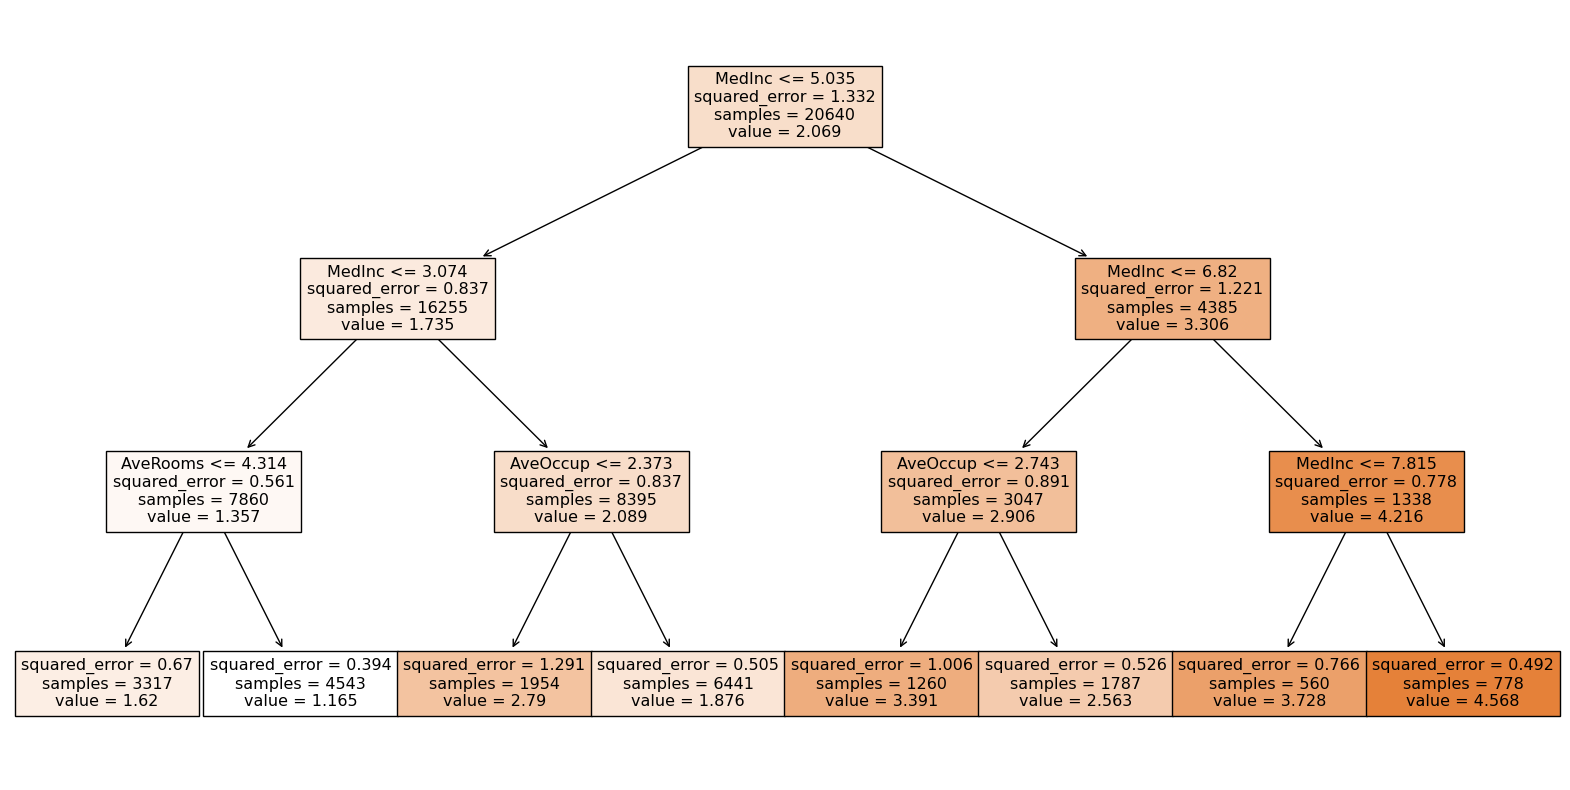

In [85]:
# Q2a
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']

# Fit a decision tree with max depth of 3
tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
tree_model.fit(X, y)

# Visualize the tree structure
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=data.feature_names, filled=True)
plt.show()

In [ ]:
# Q2b

# Answer: The average value of the median house price in the dataset is 2.069.

In [87]:
# Q2c
# SSR at the root node
root_prediction = y.mean()
ssr_root = np.sum((y - root_prediction) ** 2)

# SSR at the leaf nodes
leaf_predictions = tree_model.predict(X)
ssr_leaf = np.sum((y - leaf_predictions) ** 2)
leaf_predictions

# % reduction in SSR
percentage_reduction = ((ssr_root - ssr_leaf) / ssr_root) * 100

print(f"SSR at root node: {ssr_root}")
print(f"SSR at leaf nodes: {ssr_leaf}")
print(f"Percentage reduction in SSR: {percentage_reduction}%")

# Answer: 
# SSR at root node: 27483.19819368851
# SSR at leaf nodes: 12804.326615748183
# Percentage reduction in SSR: 53.41034720373743%

array([4.56829402, 4.56829402, 3.7275928 , ..., 1.16457035, 1.16457035,
       1.16457035])

SSR at root node: 27483.19819368851
SSR at leaf nodes: 12804.326615748183
Percentage reduction in SSR: 53.41034720373743%


In [89]:
# Q2d
dummy_observation = {'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}
dummy_df = pd.DataFrame([dummy_observation])

predicted_value = tree_model.predict(dummy_df)[0]
actual_value = 2.0  
mse_dummy = (actual_value - predicted_value) ** 2

print(f"Predicted value for dummy observation: {predicted_value}")
print(f"MSE for dummy observation: {mse_dummy}")

# Answer: Predicted value for dummy observation: 1.8758614019562099 and the MSE for dummy observation: 0.015410391524277693

Predicted value for dummy observation: 1.8758614019562099
MSE for dummy observation: 0.015410391524277693


In [118]:
# Q2e
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit a full decision tree on the training data
full_tree_model = DecisionTreeRegressor(random_state=1)
full_tree_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = full_tree_model.predict(X_val)

# Calculate MSE on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"MSE on Validation Set: {mse_val}")

# Answer: The MSE on the validation set is 0.4952761214381298

DecisionTreeRegressor(random_state=1)

MSE on Validation Set: 0.4952761214381298


In [122]:
# Q2f
bagging_model = RandomForestRegressor(n_estimators=200, random_state=1)
bagging_model.fit(X_train, y_train)

y_bagging_val_pred = bagging_model.predict(X_val)

mse_bagging_val = mean_squared_error(y_val, y_bagging_val_pred)
print(f"MSE on Validation Set (Bagging): {mse_bagging_val}")

# Answer: MSE on Validation Set (Bagging): 0.2583273468790679

RandomForestRegressor(n_estimators=200, random_state=1)

MSE on Validation Set (Bagging): 0.2583273468790679


In [130]:
# Q2g
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=1, max_features="sqrt")
random_forest_model.fit(X_train, y_train)

y_rf_val_pred = random_forest_model.predict(X_val)

mse_rf_val = mean_squared_error(y_val, y_rf_val_pred)
print(f"MSE on Validation Set (Random Forest): {mse_rf_val}")

# Answer: MSE on Validation Set (Random Forest): 0.2437621519036966

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

MSE on Validation Set (Random Forest): 0.2437621519036966


RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

<BarContainer object of 8 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'MedInc'),
  Text(1, 0, 'Longitude'),
  Text(2, 0, 'Latitude'),
  Text(3, 0, 'AveOccup'),
  Text(4, 0, 'AveRooms'),
  Text(5, 0, 'HouseAge'),
  Text(6, 0, 'AveBedrms'),
  Text(7, 0, 'Population')])

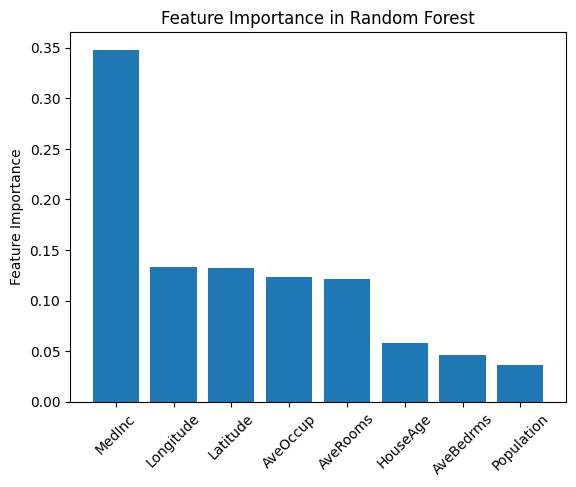

In [136]:
# Q2h
random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=1, max_features="sqrt")
random_forest_regressor.fit(X_train, y_train)

# Get feature importances and feature names
feature_importances = random_forest_regressor.feature_importances_
feature_names = data.feature_names

# Do a reverse sorted vertical bar plot
indices = np.argsort(feature_importances)[::-1]           # [::-1] reverses the order
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)                                   # otherwist xticks is overcrowded with text
plt.show()
    
# Answer: The Random Forest model is the best because it has the lower MSE of 0.2437621519036966.
# The most important variable in the model would be MedInc based on the bar plot.

### Q3
Use the California housing dataset (`fetch_california_housing`) from `sklearn.datasets` for this question, the objective is to predict the median house price `target` based on all available features in the dataset. Where necessary, set seed values and/or random_state to `8`. Where applicable, ensure the data is suitably standardized. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated.

##### (a) Perform a K-Nearest Neighbors (KNN) regression on the entire dataset using `K=3` and report the corresponding MSE.
##### (b) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted KNN regression from `Q3a` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.
##### (c) Use a validation approach where 70% of the data is used for training and 30% is used for validation. Perform a KNN regression using `K=3` on the training data. Calculate and report the MSE on the validation set.
##### (d) Perform hyperparameter tuning to find the optimal value of K for KNN, using K values ranging from 1 to 20, with 5-folds cross validation strategy. Report the optimal K and the corresponding cross-validated MSE. Fit the optimal KNN model on the training data and report the MSE on the validation set.
##### (e) Refit the optimal KNN model using the entire dataset and report the corresponding MSE.
##### (f) Given a dummy observation with following feature values: `{'target': 2.0, 'MedInc': 5.0, 'HouseAge': 25, 'AveRooms': 6.0, 'AveBedrms': 1.1, 'Population': 1500, 'AveOccup': 3.0, 'Latitude': 34.05, 'Longitude': -118.25}`. Use the fitted optimal KNN regression from `Q3e` to get the predicted value for the dummy observation, and calculate the corresponding loss function (i.e. Mean Squared Error) for this dummy observation.

In [ ]:
# Q3 Load Libraries Here


In [ ]:
# Q3a

# Answer:

In [ ]:
# Q3b

# Answer:

In [ ]:
# Q3c

# Answer:

In [ ]:
# Q3d

# Answer:

In [ ]:
# Q3e

# Answer:

In [ ]:
# Q3f

# Answer:

### Q4.
Use the Wine dataset (`load_wine`) from `sklearn.datasets` for this question, where the objective is to perform Principal Component Analysis (PCA) on the dataset containing 13 features (i.e., chemical properties of different wines). Where applicable, ensure the data is suitably standardized.
##### (a) Perform PCA on the standardized wine dataset using all available features. How many Principal Components are generated? 
##### (b) What is the eigenvector for the Second Principal Component?
##### (c) State the loading scores for the Second Principal Component in simple English.
##### (d) Which feature is the most important in influencing the Second Principal Component? Explain your answer.
##### (e) Report the Principal Component scores for the first three observations projected onto the 2nd PC.
##### (f) What is the eigenvalue for the Second Principal Component?
##### (g) What is the proportion of total variation explained by the Second Principal Component?
##### (h) Generate a scree plot with appropriate titles and axis.

In [ ]:
# Q4 Load Libraries Here


In [ ]:
# Q4a.

# Answer:

In [ ]:
# Q4b.

# Answer:

In [ ]:
# Q4c

# Answer:

In [ ]:
# Q4d

# Answer:

In [ ]:
# Q4e

# Answer:

In [ ]:
# Q4f

# Answer:

In [ ]:
# Q4g

# Answer:

In [ ]:
# Q4h


### Q5. 
Use the Diabetes dataset (`load_diabetes`) from `sklearn.datasets` for this question, where the objective is to predict the progression of the disease (`target`) based on all available features. Set all seed values and random_state to `1` for reproducibility where necessary. Where applicable, use `adam` as the optimizer, with a batch size of `32`, and epochs is `1000`. Where applicable, MSE is to be calculated using the default formula (i.e. not regression formula) to evaluate model's performance, unless otherwise stated. Where applicable for neural networks, ensure the data is suitably standardized.

##### (a) Perform a multiple linear regression on the entire dataset. Report the Mean Squared Error (MSE).
##### (b) Perform a multiple linear regression using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (c) Use a neural network structure with 2 hidden layers, with each layer having 2 hidden nodes with the softplus activation function; having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (d) Using the same neural network architecture from `Q5c`, fit the model using 70% of the data for training and 30% for validation. Report the validation MSE.
##### (e) Use a neural network structure with 64 nodes in the first hidden layer and 32 nodes in the second hidden layer (both using softplus); having one node in the output layer with the linear activation function. Fit the model on the entire dataset and report the MSE.
##### (f) Using the same neural network architecture from `Q5e` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (g) Using the same neural network architecture from `Q5e` but change the activation function to relu. Report the MSE.
##### (h) Using the same neural network architecture from `Q5g` but use 70% of the data for training and 30% for validation. Report the validation MSE.
##### (i) Without further calculations, which model from `Q5a` to `Q5h` performs the best? Explain your answer.
##### (j) Without further calculations, using the best model from `Q5i` to fit the entire dataset, what will the MSE be? Explain your answer.
##### (k) Without further calculations, which model from `Q5a` to `Q5h` performs the worst? Explain your answer. Suggest the problem that is causing the poor performance and identify ways to improve performance of this model.

In [ ]:
# Q5 Load Libraries Here


In [ ]:
# Q5a

# Answer:

In [ ]:
# Q5b

# Answer:

In [ ]:
# Q5c

# Answer:

In [ ]:
# Q5d

# Answer:

In [ ]:
# Q5e

# Answer:

In [ ]:
# Q5f

# Answer:

In [ ]:
# Q5g

# Answer:

In [ ]:
# Q5h

# Answer:

In [ ]:
# Q5i

# Answer:

In [ ]:
# Q5j

# Answer:

In [ ]:
# Q5k

# Answer:

### Q6.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 1 to 6` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 1 to 6`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

In [ ]:
# Q6 Question here


In [ ]:
# Q6 Answer here


### Q7.
Developing effective practice questions and solutions is a key indicator of topic mastery. This question requires you to create an assignment question based on any materials covered in `Lectures 7 to 12` and provide a corresponding solution.

Marks will be awarded based on following:
  - Clarity: Ensure the question is clearly and concisely phrased, leaving no ambiguity for the student. 
  - Accuracy: The solution provided must be correct and aligned with the concepts taught in the lectures.
  - Structured Solution: The solution must be well-structured, showing logical steps from problem statement to final answer.
  - Relevance: The question must focus on topics covered in `Lectures 7 to 12`.
  - Creativity: Questions should be novel and demonstrate depth in understanding. Avoid replicating questions shown in the course.

In [ ]:
# Q7 Question here


In [ ]:
# Q7 Answer here
